# Scalar Spherical Harmonics

Recall that harmonic functions are those which satisfy Laplace's equation, which in spherical coordinates is
$$ \nabla^2 f = \frac{1}{r^2}\frac{\partial}{\partial r} \left( r^2 \frac{\partial f}{\partial r} \right) + \frac{1}{r^2 \sin \theta}\frac{\partial}{\partial \theta}\left( \sin \theta \frac{\partial f}{\partial \theta}\right) + \frac{1}{r^2 \sin^2 \theta}\frac{\partial^2 f}{\partial \phi^2}=  0. $$

This equation can be solved using the method of separation of variables. Write $f=R(r) \Theta (\theta) \Phi (\phi)$. Then after multiplying through by $\frac{r^2 \sin^2  \theta}{R \Theta \Phi}$ the equation above becomes
$$ \frac{\sin^2  \theta}{R}\frac{d}{d r} \left( r^2 \frac{d R}{d r} \right) + 
\frac{\sin  \theta}{\Theta }\frac{d}{d \theta}\left( \sin \theta \frac{d \Theta}{d\theta}\right) + 
\frac{1}{\Phi }\frac{d^2 \Phi}{d \phi^2}=  0. $$

Since the final term is the only one that depends on $\phi$, we must have that 
$$ \frac{1}{\Phi}\frac{d^2 \Phi}{d \phi^2}=\mu$$
for some constant $\mu$. This has eigenfunctions of the form $\Phi_m(\phi)=e^{im\phi}$ for integer $m$, and thus $\mu=-m^2$. 

Making the replacement and dividing by $\sin^2 \theta$ :
$$ \frac{1}{R}\frac{d}{d r} \left( r^2 \frac{d R}{d r} \right) + 
\frac{1}{\Theta\sin  \theta  }\frac{d}{d \theta}\left( \sin \theta \frac{d \Theta}{d\theta}\right) - 
\frac{m^2}{\sin^2 \theta}=  0. $$

As before, since the first term in this equation is the only one that depends on $r$, we must have 
$$ \frac{1}{R}\frac{d}{d r} \left( r^2 \frac{d R}{d r} \right)=\lambda $$
and
$$ \frac{1}{\Theta \sin \theta}\frac{d}{d \theta}\left( \sin \theta \frac{d \Theta}{d\theta}\right) -
\frac{m^2}{ \sin^2 \theta}= -\lambda $$
for some constant $\lambda$. Expanding the $r$-dependent equation gives
$$ r^2\frac{d^2R}{dr^2}+ 2r\frac{dR}{dr}=\lambda R $$
which implies that $R$ is of the form $R=r^l$. Substituting that in leads to the conclusion $\lambda=(l+1)l$.

Finally, to find $\Theta$ we have
$$ \frac{1}{\sin \theta}\frac{d}{d \theta}\left( \sin \theta \frac{d \Theta}{d\theta}\right)+\left( l(l+1) -
\frac{m^2}{ \sin^2 \theta} \right) \Theta=0. $$
Making a change of variables to $x=\cos\theta$ yields
$$ \frac{d}{dx}\left( (1-x^2)\frac{d \Theta}{dx} \right)+\left(l(l+1)-\frac{m^2}{1-x^2}\right)\Theta=0$$
which is recognisable as the general Legendre equation. The solution is a multiple of the Associated Legendre Polynomials, which can be written in terms of the Legendre polynomials $P_l(x)$ as
$$ P^m_l(x)=(1-x^2)^{|m|/2}\frac{d^{|m|}}{dx^{|m|}}P_l(x)$$

Thus, the angular part of the harmonic function, $Y(\theta,\phi)=\Theta(\theta)\Phi(\phi)$ can be written as a linear combination of the Spherical Harmonic Functions of degree $l$ and order $m$
$$Y^m_l(\theta,\phi)=N\exp^{im\phi}P^m_l(\cos \theta)$$
with $-l\leq m \leq l$. $N$ is a normalisation constant
$$ N= (-1)^m \sqrt{ \left(\frac{2l+1}{4\pi}\frac{(l-m)!}{(l+m)!}\right)}$$
chosen to ensure the spherical harmonics are orthonormal.

The spherical harmonics are implemented in the SciPy Special Functions:
scipy.special.sph_harm(m,l,phi,theta).

(Note the conventions in the scipy documentation are different- they define $\theta$ and $\phi$ inversely to above, and denote the degree by $n$ instead of $l$. I have followed the conventions common in the gravitational wave astronomy literature.)

To start with, let's plot a few of the spherical harmonics. Because they are complex, I will plot the absolute value and real and complex parts separately.

In [1]:
import numpy as np
import scipy as sp
from scipy import special
import matplotlib.pyplot as plt
from matplotlib import cm, colors
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

plt.style.use('ggplot')

In [2]:
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
#Now we convert to cartesian coordinates
# for the 3D representation
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)
norm = colors.Normalize()

Degree l=0
Order m=0


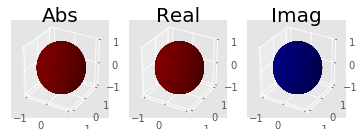

Degree l=1
Order m=-1


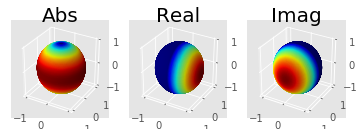

Order m=0


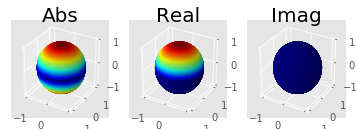

Order m=1


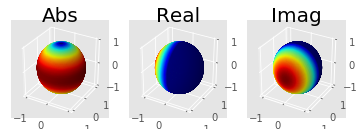

In [3]:
for l in range(2):
    print 'Degree l='+str(l)
    for m in range(-l,l+1):
        print 'Order m='+str(m)
        Ylm=special.sph_harm(m, l, PHI, THETA)

    

        #create 3 plots for abs, real, imaginary parts.
        fig, ax = plt.subplots(1,3,subplot_kw=dict(projection='3d'))

        #calculate abs
        A = np.abs(Ylm)
        if A.max()==0:
            AN=A
        else:
            AN = A/A.max()    # Normalize A for the plot colors to cover the entire range of colormap.
        #Plot abs
        ax[0].plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(AN))
        ax[0].set_aspect(1.)
        ax[0].set_title('Abs', fontsize=20)


        #calculate real
        R=Ylm.real
        if R.max()==0:
            RN=R
        else:
            RN = R/R.max()    # Normalize R for the plot colors to cover the entire range of colormap.
        #Plot real
        ax[1].plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(RN))
        ax[1].set_aspect(1.)
        ax[1].set_title('Real', fontsize=20)

        #calculate imaginary
        I=Ylm.imag
        if I.max()==0:
            IN=I
        else:
            IN = I/I.max()    # Normalize I for the plot colors to cover the entire range of colormap.
        #Plot real
        ax[2].plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(IN))
        ax[2].set_aspect(1.)
        ax[2].set_title('Imag', fontsize=20)
  
        plt.show()
    
    


Now let's check Python's doing what we expect with the definition of the spherical harmonics in terms of the Legendre polynomials. The Legendre polynomials are also implemented in scipy.special as 
scipy.special.lpmv(m,l,x)
where for us, $x=\cos\theta$.

In [4]:
#try for different l,m, theta, phi
l,m =2,2
theta, phi = 0.6, .75

#calculate the normalising factor
import math
f = math.factorial
N = np.sqrt((2*l+1)/(4 * np.pi) * f(l-m)/f(l+m))

#check the definition
np.isclose(N*np.exp(m*phi*1j)*special.lpmv(m,l,np.cos(theta)),special.sph_harm(m,l,phi,theta))


True

Let's also check the orthonormality for a few examples. First we need to define the inner product between two functions on the sphere
$$ <f,g> = \int^{2\pi}_0 \int^{\pi}_0 f(\theta,\phi)g^*(\theta,\phi)\sin(\theta)d\theta d\phi. $$

Scipy does not integrate complex functions, so we must define this ourselves by splitting the integrand into real and imaginary parts.

In [5]:
def dotprod(f,g):
    integrand_r = lambda theta, phi: np.real(f(theta, phi) * np.conj(g(theta, phi)) * np.sin(theta))
    integrand_i = lambda theta, phi: np.imag(f(theta, phi) * np.conj(g(theta, phi)) * np.sin(theta))
    rr = sp.integrate.dblquad(integrand_r, 0, 2 * np.pi,lambda theta: 0, lambda theta: np.pi)[0]
    ri = sp.integrate.dblquad(integrand_i, 0, 2 * np.pi,lambda theta: 0, lambda theta: np.pi)[0]
    if np.allclose(rr,0):
        rr = 0
    if np.allclose(ri,0):
        ri=0
    return rr + ri*1j

In [6]:
# We check the orthogonality of the spherical harmonics:
# (l,m) =! (l',m') the inner product must be zero
Ylm = lambda l, m, theta, phi: special.sph_harm(m, l, phi, theta)
f = lambda theta, phi: Ylm(4,3,theta, phi) 
g = lambda theta, phi: Ylm(4,2,theta, phi) 
dotprod(f,g)

0j

In [7]:
# And, if (l,m) = (l',m') the inner product is one.
f = lambda theta, phi: Ylm(4,3,theta, phi) 
g = lambda theta, phi: Ylm(4,3,theta, phi) 
dotprod(f,g)

(1+0j)


In fact, the spherical harmonics make up a complete orthonormal set in $L^2(\mathbb{S}^2)$, so any square integrable function on the sphere $f(\theta, \phi):\mathbb{S}^2\rightarrow \mathbb{C}$ can be written in the form
$$ f(\theta, \phi)=\sum^{\infty}_{l=0}\sum^l_{m=-l} a_{lm} Y^m_l(\theta, \phi),$$
where the coefficients are given by the inner product
$$a_{lm}=<f,Y^m_l>.$$
For example, consider the polynomial function
$$f(\theta,\phi) = \theta(\theta-\pi)\phi(\phi-2\pi) $$


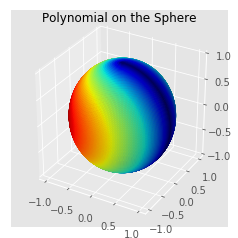

In [8]:
PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
#Now we convert to cartesian coordinates
# for the 3D representation
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)

f = lambda theta, phi: theta*(theta-np.pi)*phi*(phi-2*np.pi)

fvals=f(THETA,PHI)
norm = colors.Normalize()

fig, ax = plt.subplots(1,subplot_kw=dict(projection='3d'))

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(fvals)))
ax.set_aspect(1.)
ax.set_title('Polynomial on the Sphere', fontsize=12)

plt.show()

Let's see how the first 4 degrees of spherical harmonics approximate this function. We can do this by defining the "overlap" of two normalised functions as the real part of the inner product. So let's define a normalised polynomial f, and while we're at it, a dot product for the discrete functions on our grid. 

In [9]:
fn=dotprod(f,f)
fnorm=lambda theta, phi: f(theta,phi)/np.sqrt(fn)
fnormvals=fnorm(THETA,PHI)

In [10]:
def dotproddiscrete(f,g,theta,phi): #f,g will already be calculated on the mesh
    out=0
    dp=2*np.pi/phi.shape[0]
    dt=np.pi/theta.shape[1]
    for p in range(phi.shape[0]):
        for t in range(theta.shape[1]):
            out+=f[p][t]*np.conj(g[p][t])*np.sin(theta[p][t])*dp*dt
    return out

In [11]:
#This should return the surface area of the unit sphere (4pi)
testf=lambda theta, phi: 1+0*theta*phi
tf=testf(THETA,PHI)
print dotprod(testf,testf)
print dotproddiscrete(tf,tf,THETA,PHI)

(12.5663706144+0j)
12.439662908313094


The difference is because of the discretisation, however refining the discretisation sufficiently makes everything run too slow. 

Now let's check the approximation using spherical harmonics. We'll calculate the overlap for each degree and plot the difference between the approximation and the polynomial.

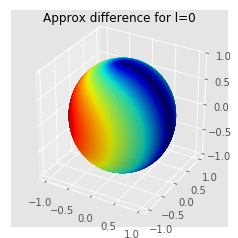

Overlap=(0.9950583735288865+0j)


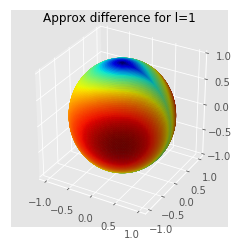

Overlap=(0.999279151429283+0j)


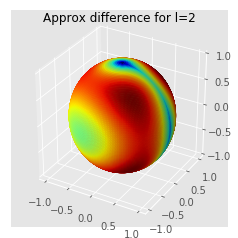

Overlap=(0.9997438308983161+0j)


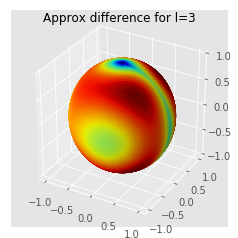

Overlap=(0.9998564556413614+0j)


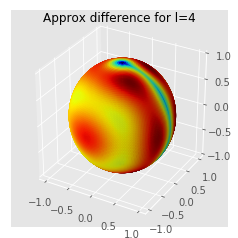

Overlap=(0.9999069883251717+0j)


In [12]:
zerof=lambda theta, phi: 0*theta*phi
approx=zerof(THETA,PHI)
for l in range(5):
    for m in range(-l,l+1):
        Ylm2= lambda theta,phi: special.sph_harm(m, l, phi, theta)
        alm=dotprod(fnorm,Ylm2)
        approx=approx+alm*Ylm2(THETA,PHI)
        
    #normalise the approximation
    approxn=dotproddiscrete(approx,approx,THETA,PHI)
    #calculate the overlap
    overlap=np.real(dotproddiscrete(approx,fnormvals,THETA,PHI))/approxn 
    
    #calculate difference
    diff=np.real(fnormvals-approx/approxn)
    
    #plot difference
    norm = colors.Normalize()

    fig, ax = plt.subplots(1,subplot_kw=dict(projection='3d'))

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(diff)))
    ax.set_aspect(1.)
    ax.set_title('Approx difference for l='+str(l), fontsize=12)
    
    plt.show()
    
    print 'Overlap='+str(overlap)

It can be seen the spherical harmonics provide a reasonable approximation. (quantify this)

## Chirplets on the sphere



Chassande-Mottin defined chirplets in the time domain as:
$$ \psi(t) \equiv A \exp \left(-\frac{(2\pi f)^2}{Q^2}(t-\tau)^2 \right) \exp(2\pi i \left[f(t-\tau)+d(t-\tau)^2/2 \right] )$$
where $\tau$ and $f$ are the centre time and frequency, respectively, $Q$ is the dimensionless quality factor, and $A=(8\pi f^2/Q^2)^{1/4}$ is a normalisation factor. The chirp rate $d$ changes the chirplet frequency linearly in time. Chirplets are associated with a 4D parameter space $\Theta=\lbrace \tau,f,Q,d \rbrace$.

The chirplet duration is given by 
$$ \Delta_t \equiv 2 \sqrt(\pi)\int (t-\tau)^2 \psi^2 (t) dt = Q/(2\sqrt{\pi}f) $$

In [13]:
def Chirplet(input_parameters,t):
    if len(input_parameters) != 4:
        print "Error! Need 4 parameters"
    
    tau = float(input_parameters[0]) #central time
    f = float(input_parameters[1]) #central frequency
    Q = input_parameters[2] #quality factor
    d = float(input_parameters[3]) #chirp rate
    
    A = ((8*np.pi*f**2)/(Q**2))**(0.25) #normalisation
    delta_t = Q/(2*np.pi**0.5*f) #chirplet duration

    #if times is None:
        #times=np.linspace(tau - 2*delta_t, tau + 2*delta_t, 10000)
        
    return A*np.exp(-(((2*np.pi*f)**2)*(t-tau)**2)/Q**2)*np.exp(2*np.pi*np.complex(0,1)*(f*(t-tau)+(d*(t-tau)**2)/2))  

/usr/local/lib/python2.7/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


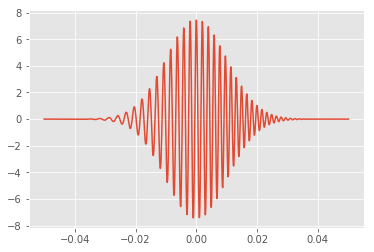

In [14]:
t_central= 0.0
f_central= 495.91
Q = 44.065       #Quality factor, affects the envelope width
d = 5510.2    #chirp rate

delta_t = Q/(2*np.sqrt(np.pi)*f_central) #chirplet duration
times=np.linspace(t_central - 2*delta_t, t_central + 2*delta_t, 1000)

cvalues=[]

for t in times:
    cvalues.append(Chirplet([t_central,f_central,Q,d],t))

plt.plot(times, cvalues)
plt.show()

Now, over the sphere, suppose there is a phase shift according to the polar coordinate $\phi$ 

In [27]:
tau= 0.0
f_central= 495.91
Q = lambda phi,theta: 44.065*(1+0.5*np.cos(phi)*np.sin(theta))       #Quality factor, affects the envelope width
Q = 44.065
d = 5510.2    #chirp rate

delta_t = Q/(2*np.sqrt(np.pi)*f_central) #chirplet duration
times=np.linspace(tau - 2*delta_t, tau + 2*delta_t, 100)

def ChirpSphere(input_parameters,phi, theta, t):
    if len(input_parameters) != 4:
        print "Error! Need 4 parameters"
    
    tau = float(input_parameters[0]) #central time
    f = float(input_parameters[1]) #central frequency
    Q = input_parameters[2] #quality factor
    d = float(input_parameters[3]) #chirp rate
    
    A = ((8*np.pi*f**2)/(Q**2))**(0.25) #normalisation
    delta_t = Q/(2*np.pi**0.5*f) #chirplet duration
        
    return A*np.exp(-(((2*np.pi*f)**2)*(t-tau)**2)/Q**2)*np.exp(2*np.pi*np.complex(0,1)*(f*(t-tau)+(d*(t-tau)**2)/2)+np.complex(0,1)*(phi+theta))

cvalues=[ChirpSphere([tau,f_central,Q,d],PHI,THETA,times[0])]

for t in times[1:]:
    cvalues.append(ChirpSphere([tau,f_central,Q,d],PHI,THETA,t))

0
0
10
20
30
40
50
60
70
80
90


0


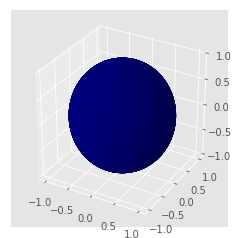

In [28]:
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)

norm = colors.Normalize()

fig, ax = plt.subplots(1,subplot_kw=dict(projection='3d'))
ax.set_aspect(1.)
ax.set_title('Chirplet on the Sphere', fontsize=12)

#initial plot
surface=ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(cvalues[0].real))

#function to update plot
def animate(i):
    if i%10==0:
        print i
    ax.clear()
    surface=ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(cvalues[i].real))
    return surface,
    
anim = FuncAnimation(
    fig, animate, interval=100, frames=len(times)-1)

HTML(anim.to_html5_video())

At each time $t$ we can decompose the chirplet on the sphere into spherical harmonic components.

In [29]:
ALM={}

for l in range(5):
    for m in range(-l,l+1):
        Ylm2= lambda theta,phi: special.sph_harm(m, l, phi, theta)
        Y=Ylm2(THETA,PHI)
        ALM[(l,m)]=[]
        for t in range(len(times)):
            ALM[(l,m)].append(dotproddiscrete(cvalues[t],Y,THETA,PHI))

l=0, m=0


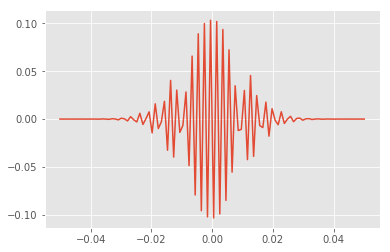

l=1, m=-1


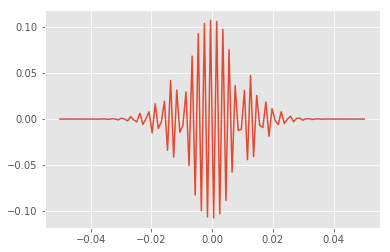

l=1, m=0


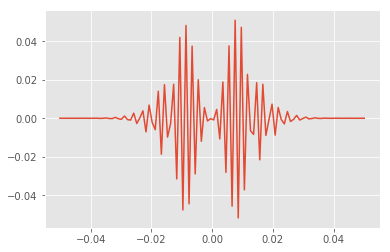

l=1, m=1


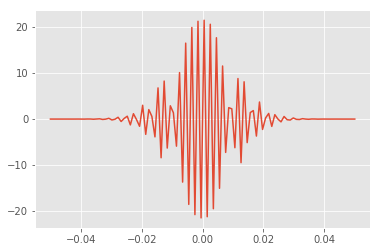

l=2, m=-2


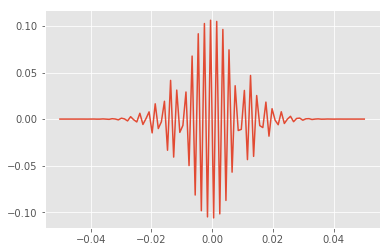

l=2, m=-1


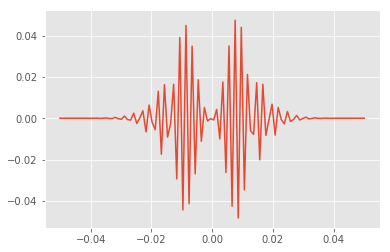

l=2, m=0


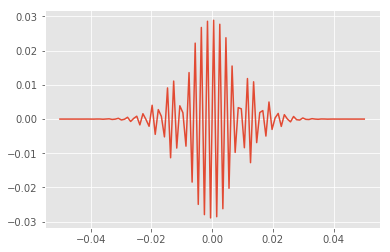

l=2, m=1


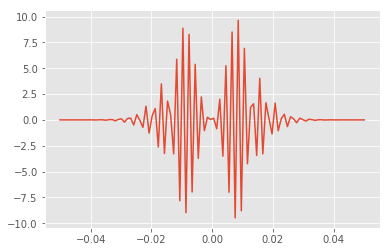

l=2, m=2


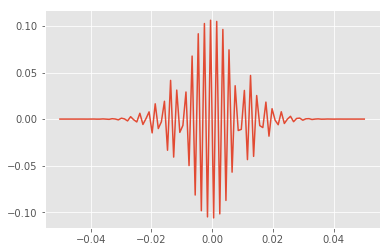

l=3, m=-3


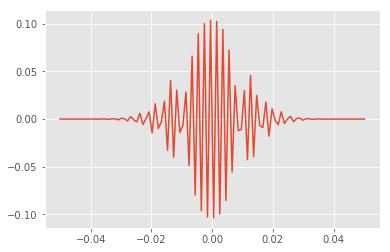

l=3, m=-2


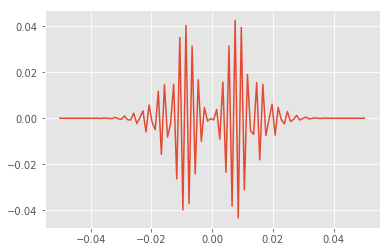

l=3, m=-1


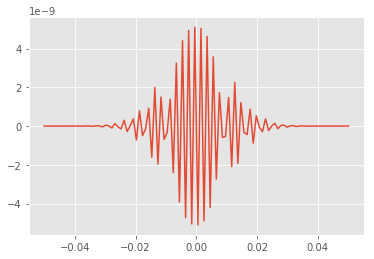

l=3, m=0


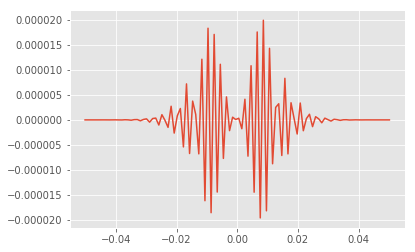

l=3, m=1


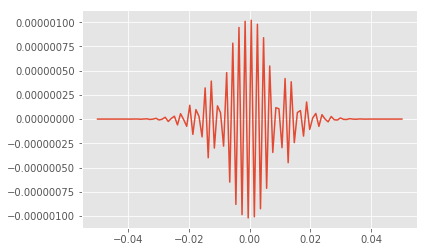

l=3, m=2


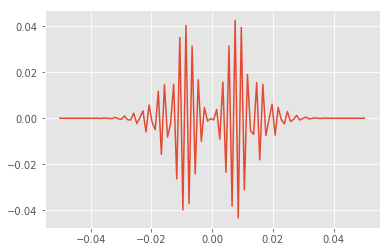

l=3, m=3


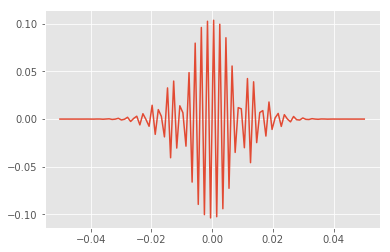

l=4, m=-4


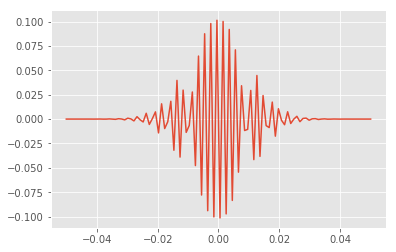

l=4, m=-3


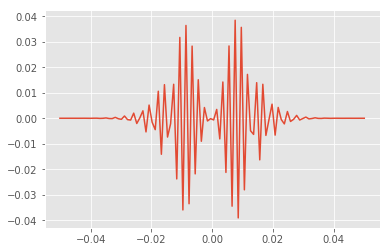

l=4, m=-2


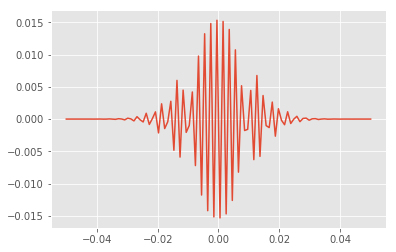

l=4, m=-1


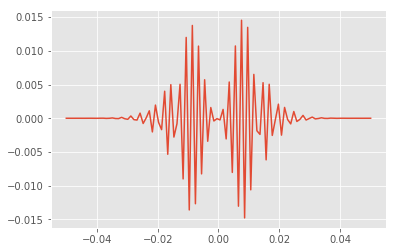

l=4, m=0


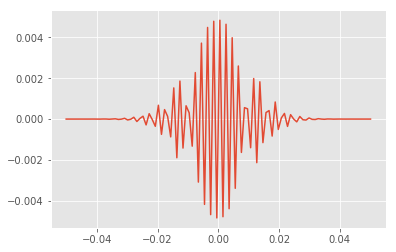

l=4, m=1


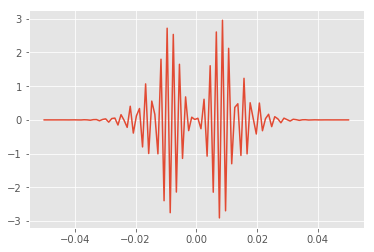

l=4, m=2


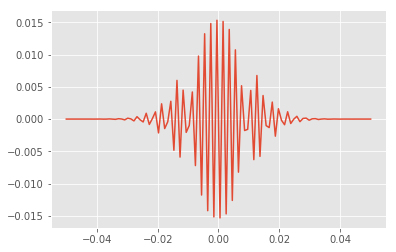

l=4, m=3


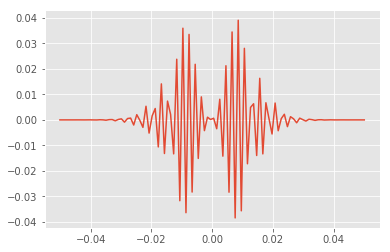

l=4, m=4


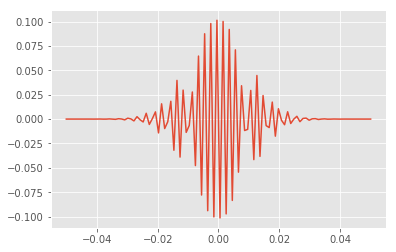

In [30]:
for l in range(5):
    for m in range(-l,l+1):
        print 'l='+str(l)+', m='+str(m)
        plt.plot(times,ALM[(l,m)])
        plt.show()

# Note
The below is practice work or otherwise unfinished.

Suppose we have a system dependent on four intrinsic parameters $\Lambda=(\lambda_0,\lambda_1,\lambda_2,\lambda_3)$ which produces chirplets that vary over the sphere such that the effect on the central frequency, chirp rate and quality factor is as follows:
$$ f=\frac{\lambda_0 \lambda_1}{\lambda_0+\lambda_1} $$
$$ d=\frac{\lambda_0 \lambda_1}{(\lambda_0+\lambda_1)^2}\cos(\lambda_2+\lambda_3)$$
$$ Q=\sqrt{\frac{4}{9}\pi f}$$

In [19]:
tau= 0.0
f_central = lambda l0,l1: l0*l1/(l0+l1)
chirprate = lambda l0, l1, l2, l3: (l0*l1/(l0+l1)**2)*np.cos(l2 + l3)
Quality= lambda l0,l1, phi, theta: np.sqrt((4.0/9.0)*np.pi*f_central(l0,l1))*np.cos(phi)*np.sin(theta)+5.0/9.0

In [20]:
l0, l1, l2, l3 = 22,22,0.0,np.pi/2

dt_max=Quality(l0,l1,0,np.pi/2)/(2*np.sqrt(np.pi)*f_central(l0,l1))


t_0 = tau-2*dt_max
t_1 = tau+2*dt_max/2
n = 100
times = np.linspace(t_0,t_1,n) 

f= 495.91 #f_central(l0, l1) #f= 495.91
d= 5510.2 #chirprate(l0,l1,l2,l3)    
print f
print d
print Quality(l0, l1, l2, l3)
#tau=0



#t=t_1/2

Q2= lambda l0,l1, phi, theta: 0*phi+0*theta+0*l0+0*l1+44.065 
#ChirpletSphere=lambda tau,f,d,l0,l1,phi,theta,t: Chirplet([tau,f,Quality(l0,l1,phi,theta),d],t)
ChirpletSphere=lambda tau,f,d,l0,l1,phi,theta,t: Chirplet([tau,f,Q2(l0,l1,phi,theta),d],t)


csphere=[ChirpletSphere(tau,f,d,l0,l1,PHI,THETA,times[0])]

for t in times[1:]:
    csphere.append(ChirpletSphere(tau,f,d,l0,l1,PHI,THETA,t))

495.91
5510.2
4.474598476671641


0
0
10
20
30
40
50
60
70
80
90


0


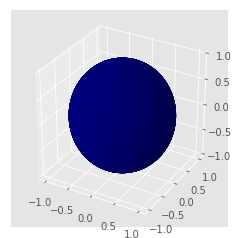

In [21]:
X = np.sin(THETA) * np.cos(PHI)
Y = np.sin(THETA) * np.sin(PHI)
Z = np.cos(THETA)

norm = colors.Normalize()

fig, ax = plt.subplots(1,subplot_kw=dict(projection='3d'))
ax.set_aspect(1.)
ax.set_title('Chirplet on the Sphere', fontsize=12)

#initial plot
surface=ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(csphere[0].real))

#function to update plot
def animate(i):
    if i%10==0:
        print i
    ax.clear()
    surface=ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(csphere[i].real))
    #surface.set_data(csphere[i].real)
    return surface,
    
anim = FuncAnimation(
    fig, animate, interval=100, frames=len(times)-1)

HTML(anim.to_html5_video())

0
0
10
20
30
40
50
60
70
80
90


0


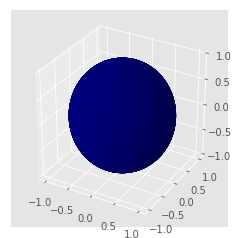

In [22]:
#Create surface function
function=lambda phi,theta,t: np.cos(phi*t)*np.sin(theta*t) 

t2=range(100)

fsphere=[function(PHI,THETA,t2[0])]

for t in t2[1:]:
    fsphere.append(function(PHI,THETA,t))

norm = colors.Normalize()

fig, ax = plt.subplots(1,subplot_kw=dict(projection='3d'))
ax.set_aspect(1.)
ax.set_title('Time Varying Function on the Sphere', fontsize=12)

#initial plot
surface=ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(fsphere[0].real))

#function to update plot
def animate(i):
    if i%10==0:
        print i
    ax.clear()
    surface=ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(fsphere[i]))
    #surface.set_data(csphere[i].real)
    return surface,
    
anim = FuncAnimation(
    fig, animate, interval=100, frames=len(t2)-1)

HTML(anim.to_html5_video())

In [23]:
L0,L1,L2,L3 = np.mgrid[20:25:10j,20:25:10j, 0:np.pi:10j, 0:np.pi:10j]

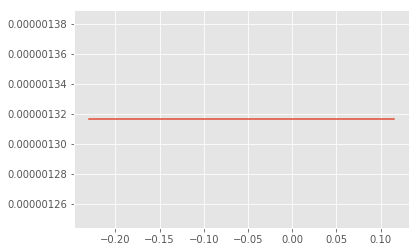

In [24]:
plt.plot(times, csphere[:][50][0].real)
plt.show()